<a href="https://colab.research.google.com/github/akulkarni14/AAI-praticals/blob/main/PR9_Visual_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dog.jpg to dog.jpg


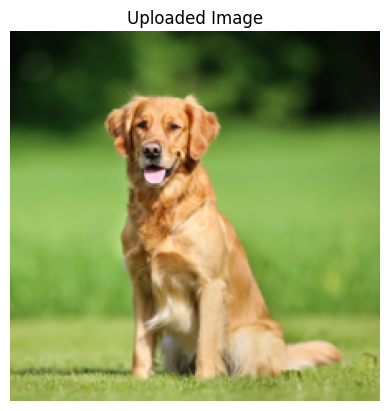

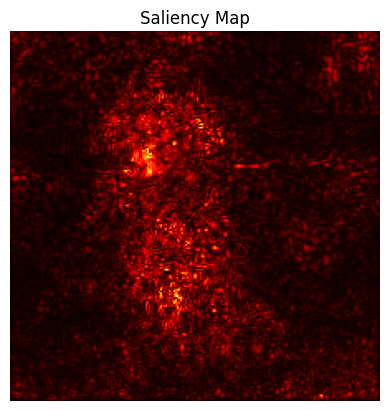

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 

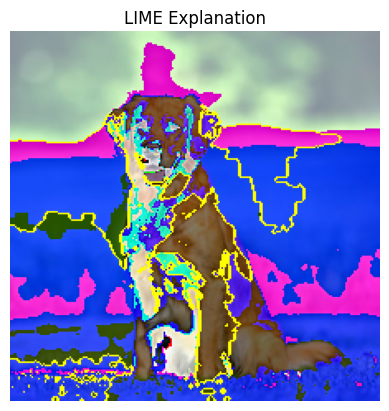

In [2]:
# Install dependencies
!pip install lime --quiet

# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries
from google.colab import files
from PIL import Image
import io

# Upload image
uploaded = files.upload()
for fname in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[fname])).convert('RGB').resize((224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)

    # Display uploaded image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Load model
    model = VGG16(weights='imagenet')

    # --- Saliency Map ---
    img_tensor = tf.convert_to_tensor(img_preprocessed)
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        top_class = tf.argmax(predictions[0])
        top_class_score = predictions[:, top_class]
    grads = tape.gradient(top_class_score, img_tensor)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]
    plt.imshow(saliency, cmap='hot')
    plt.axis('off')
    plt.title("Saliency Map")
    plt.show()

    # --- LIME Explanation ---
    def predict_fn(images):
        return model.predict(preprocess_input(images))

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(np.uint8(img_array), predict_fn, top_labels=5, hide_color=0, num_samples=1000)
    lime_img, mask = explanation.get_image_and_mask(label=explanation.top_labels[0], positive_only=True, hide_rest=False)
    plt.imshow(mark_boundaries(lime_img / 255.0, mask))
    plt.axis('off')
    plt.title("LIME Explanation")
    plt.show()
